In [119]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from collections import Counter

In [126]:
with open('../data/tweet-annotator-raw-data.json') as json_file:
    data = json.load(json_file)

In [127]:
def matched_annotations(annotations):
    if len(annotations) != 3:
        return 0
    conted = Counter(annotations)
    return max(conted.values())

data['tweets'] = [tweet for tweet in data['tweets'] if 'annotatedBy' in tweet and matched_annotations(tweet['annotations']) >= 2]

In [139]:
unique_users = []
for tweet in data['tweets']:
    unique_users = unique_users + tweet['annotatedBy']
        
unique_users = list(set(unique_users))
unique_users.remove('2zELMic0CCV-geiWqnXLZ')
unique_users.remove('_8OdW_ggLBKpTRnlypeUV')
unique_users.remove('EmEe2TEYxAFbNqbon8csP')
unique_users.remove('lxDqrTwuZCV04obOBeyfw')

In [140]:
unique_users

['a6d9bDERMgJ8CgOHwquoG',
 'LZK4RILvq6lNKfIBDtpPT',
 'uEFvWyp7i_JTr61rMgvpc',
 'pyNjv9i4A3WcRNK_mfmmq',
 'wRKLb6zxuAPIsTWicXEb2',
 'I-XBG_1NlWo0pc1YUVTsq',
 'haeNlgCfyaVev3_bqw4HP',
 'WP_erMqa4hMgzo4YZPl-9',
 'CShKY0dgwWXKFG6XeV8w3',
 'eaxrkYopmtY9uMfdftOeD',
 '_0-Dtu4abTAclzMPpk2op',
 '8B1cT3-y-kQ8mgVgYywEv',
 'xvKGJTxwjwJCiGyEeGjLn',
 'gFwoTXkAcAckZCCs9-hbJ',
 'M05QqnDZEu0Fj6qrTtdSG',
 'f46DJlKR6QY5XAVvrTq0X',
 'I5mbktxDVDrpS56_2ZzlF',
 'az0rNSr8I83DWRGHt1RpJ',
 'feohhCkiAl599S9HGKkpe',
 'PBOTslQiQDWkz7n6gtRRy',
 '9c-zdRbtNg4rWX0JrWRsv',
 'cDi1Vfe9LPRtbZfMieOXg',
 'yc5gVRH266TWsfvrLGiI6',
 'pUV9RWUsVI-S3UReLVeLY',
 'rULbr8lif98CPD6bBowhQ',
 '9BZANXTjpc2b8C8In5cY4',
 'YCqKzGcQqZykIIWJe40QE',
 'aifYnRrToVksZwh5Ka_rS',
 'NQe3sR8pKUyqvQfmCSsPc',
 'k0wpzFVmnn3NZgTqck0W_',
 'hQZvZIseJXyUFJEZ78-fz',
 'DZObnpKPO3cobSJWA6zaK',
 'Rl4CQwZ4w4Y6sClp5VCS0',
 'tLvSFKbPT-mpYhiAIxGEe',
 'AzsGJVwqQOEKbtdYSngED']

In [141]:
def get_users_tweets(user_id):
    user_tweets=[]
    for tweet in data['tweets']:
        if user_id in tweet['annotatedBy']:
            index = tweet['annotatedBy'].index(user_id)
            annotation = tweet['annotations'][index]
            user_tweets.append((tweet['id'], annotation))
    return user_tweets

In [142]:
unique_users_with_tweets = {user_id: get_users_tweets(user_id) for user_id in unique_users}
unique_users_with_tweets['DZObnpKPO3cobSJWA6zaK']

[('1319551055424794631', 'neutralne'),
 ('1321572453399719937', 'neutralne'),
 ('1052198937321385984', 'neutralne'),
 ('1321842227249893379', 'neutralne'),
 ('1321174753269436421', 'zlosc'),
 ('1322187916127444993', 'neutralne'),
 ('1195639787593633792', 'smutek'),
 ('1061627000685842433', 'radosc'),
 ('1322172260610940928', 'oczekiwanie'),
 ('727946964634095616', 'neutralne'),
 ('544849255635365888', 'neutralne'),
 ('1208483496823525376', 'neutralne'),
 ('400981552450252800', 'podziw'),
 ('1053355515902861312', 'neutralne'),
 ('654210823775211521', 'neutralne'),
 ('954773771310821376', 'neutralne'),
 ('1060466042584096768', 'neutralne'),
 ('932251159800270848', 'neutralne'),
 ('1320956948783734784', 'podziw'),
 ('1207333805260001281', 'neutralne'),
 ('545289122902843392', 'radosc'),
 ('1061642829745807360', 'neutralne'),
 ('640035918032859136', 'oczekiwanie'),
 ('277931509250420738', 'neutralne'),
 ('1321415303205691394', 'oczekiwanie'),
 ('1060236271430393856', 'neutralne'),
 ('13200

In [143]:
def compare_users(user1_annot, user2_annot):
    matched_tweets = []
    missmatched_tweets = []
    for idx, annot in user1_annot:
        u2annot = list(filter(lambda x: x[0] == idx, user2_annot))
        if len(u2annot) != 0:
            if u2annot[0][1] == annot:
                matched_tweets.append(idx)
            else:
                missmatched_tweets.append(idx)
                
    return matched_tweets, missmatched_tweets

In [144]:
match, miss = compare_users(
    unique_users_with_tweets['pyNjv9i4A3WcRNK_mfmmq'], 
    unique_users_with_tweets['DZObnpKPO3cobSJWA6zaK']
)
print(match)
print(miss)

['1322172260610940928', '1208483496823525376', '665402819877470209', '1177267598758752257', '1060206947683700740', '1319357102419300352', '1318857982264922115', '547304503310319616', '714056108160237569', '699546598238515200', '269066654258970624']
['1180492203132686336', '1321758161838215169', '1312701933455585281']


In [145]:
matched_df = pd.DataFrame(columns=['user'] + unique_users)
miss_df = pd.DataFrame(columns=['user'] + unique_users)
ratio_df = pd.DataFrame(columns=['user'] + unique_users)
for first_user in unique_users:
    curr_user_match_data = [first_user]
    curr_user_miss_data = [first_user]
    curr_user_ratio_data = [first_user]
    for sec_user in unique_users:
        match, miss = compare_users(
            unique_users_with_tweets[first_user], 
            unique_users_with_tweets[sec_user]
        )
        if len(match) + len(miss) == 0:
            curr_user_match_data.append(None)
            curr_user_miss_data.append(None)
            curr_user_ratio_data.append(None)
            continue
            
        curr_user_match_data.append(len(match))
        curr_user_miss_data.append(len(miss))
        curr_user_ratio_data.append(len(match)/(len(miss)+len(match)))
        
#     print(curr_user_match_data, len(curr_user_match_data))
    new_match_row = pd.Series(curr_user_match_data, index=['user'] + unique_users)
    matched_df = matched_df.append(new_match_row, ignore_index=True)
    new_miss_row = pd.Series(curr_user_miss_data, index=['user'] + unique_users)
    miss_df = miss_df.append(new_miss_row, ignore_index=True)
    new_ratio_row = pd.Series(curr_user_ratio_data, index=['user'] + unique_users)
    ratio_df = ratio_df.append(new_ratio_row, ignore_index=True)

In [146]:
matched_df.set_index('user', inplace=True)
miss_df.set_index('user', inplace=True)
ratio_df.set_index('user', inplace=True)

ratio_df.head(5)

,a6d9bDERMgJ8CgOHwquoG,LZK4RILvq6lNKfIBDtpPT,uEFvWyp7i_JTr61rMgvpc,pyNjv9i4A3WcRNK_mfmmq,wRKLb6zxuAPIsTWicXEb2,I-XBG_1NlWo0pc1YUVTsq,haeNlgCfyaVev3_bqw4HP,WP_erMqa4hMgzo4YZPl-9,CShKY0dgwWXKFG6XeV8w3,eaxrkYopmtY9uMfdftOeD,...,9BZANXTjpc2b8C8In5cY4,YCqKzGcQqZykIIWJe40QE,aifYnRrToVksZwh5Ka_rS,NQe3sR8pKUyqvQfmCSsPc,k0wpzFVmnn3NZgTqck0W_,hQZvZIseJXyUFJEZ78-fz,DZObnpKPO3cobSJWA6zaK,Rl4CQwZ4w4Y6sClp5VCS0,tLvSFKbPT-mpYhiAIxGEe,AzsGJVwqQOEKbtdYSngED
user,,,,,,,,,,,,,,,,,,,,,
a6d9bDERMgJ8CgOHwquoG,1.000000,0.384615,0.333333,1.000000,0.428571,0.5,0.625,0.666667,1.000000,0.533333,...,0.666667,None,0.625000,0.000000,1.000000,0.727273,0.000000,0.444444,0.500000,0.560000
LZK4RILvq6lNKfIBDtpPT,0.384615,1.000000,0.888889,0.833333,0.75,0.769231,0.727273,0.805556,0.800000,0.684211,...,0.590909,0.842105,0.739130,0.756757,0.804878,0.702128,0.615385,0.790698,0.666667,0.777778
uEFvWyp7i_JTr61rMgvpc,0.333333,0.888889,1.000000,0.583333,0.9,0.716981,0.416667,0.692308,0.805556,0.500000,...,0.648649,0.767442,0.851852,0.666667,0.900000,0.718750,0.645161,0.666667,0.719298,0.846154
pyNjv9i4A3WcRNK_mfmmq,1.000000,0.833333,0.583333,1.000000,1,0.714286,1,0.750000,1.000000,0.500000,...,0.555556,0.785714,0.727273,0.500000,0.857143,0.642857,0.785714,0.500000,0.666667,0.666667
wRKLb6zxuAPIsTWicXEb2,0.428571,0.750000,0.900000,1.000000,1,0.25,0.4,0.772727,0.800000,0.650000,...,0.750000,0.714286,0.571429,0.434783,0.750000,0.687500,0.571429,0.640000,0.363636,0.657143


In [147]:
matched_df.values[[np.arange(matched_df.shape[0])]*2] = None
miss_df.values[[np.arange(miss_df.shape[0])]*2] = None

<ipython-input-147-fec6278cf775>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matched_df.values[[np.arange(matched_df.shape[0])]*2] = None
<ipython-input-147-fec6278cf775>:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  miss_df.values[[np.arange(miss_df.shape[0])]*2] = None


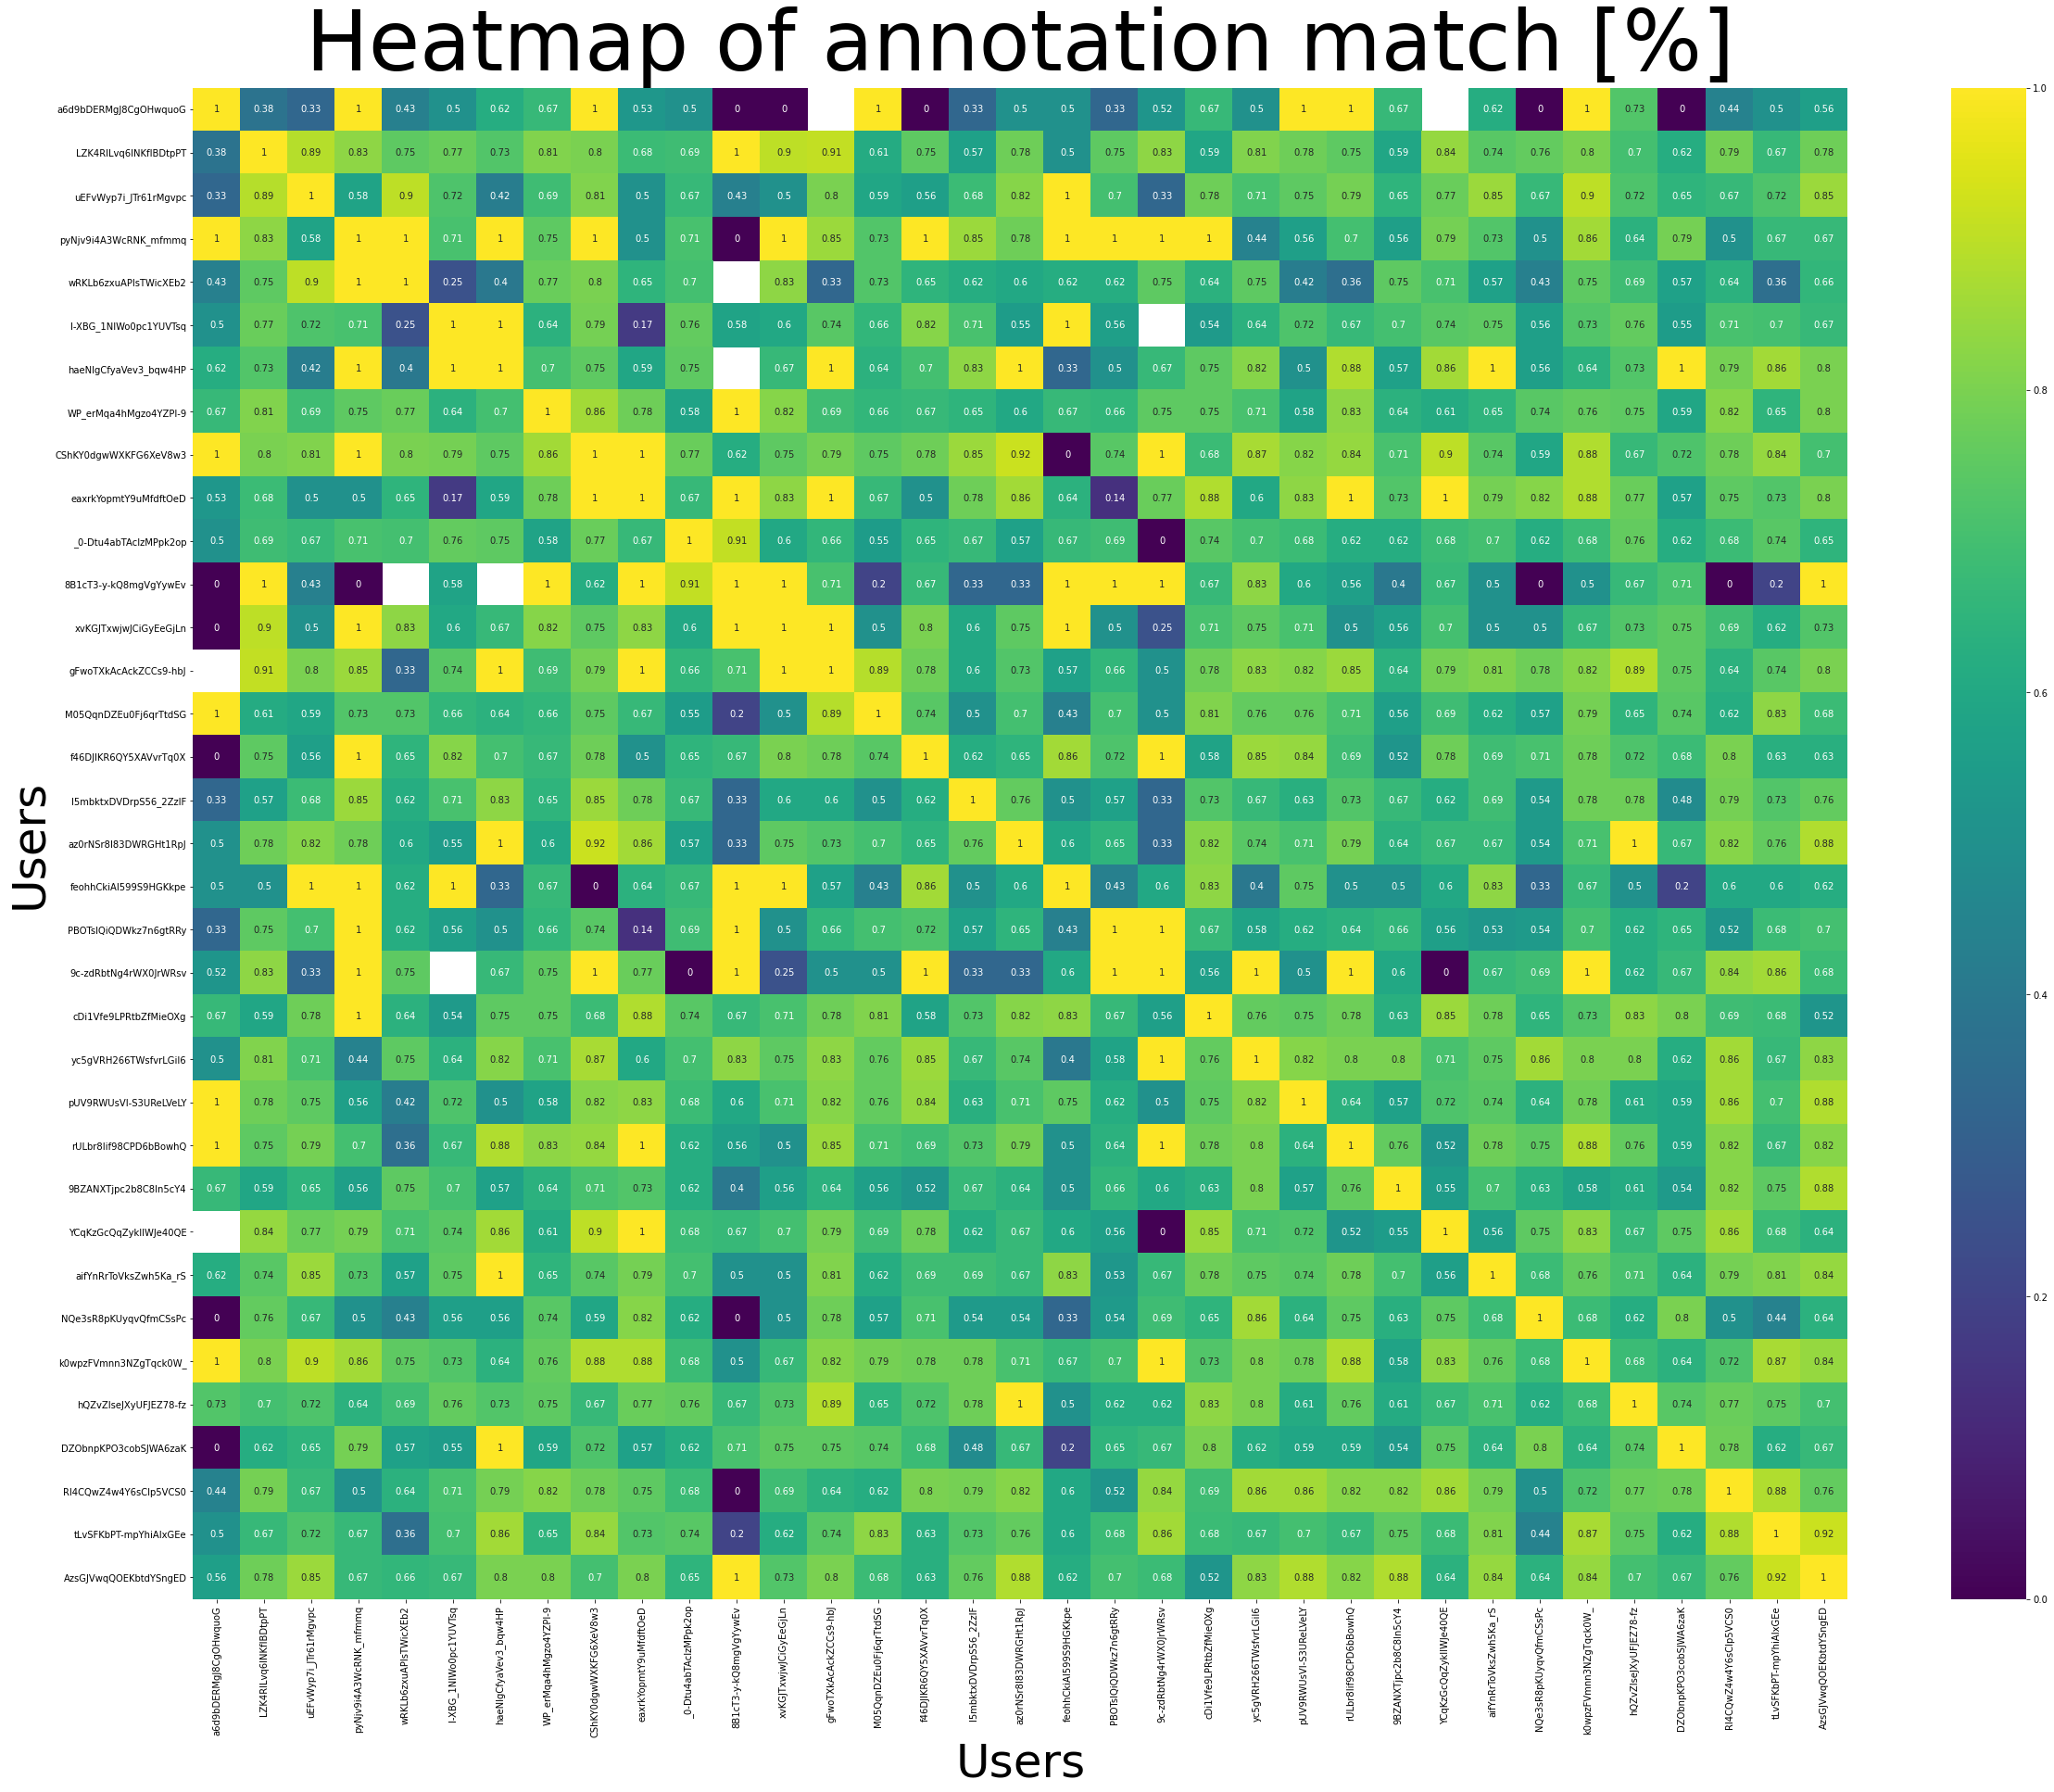

In [148]:
# ax = sns.heatmap(uniform_data, vmin=0, vmax=1)
hdf = ratio_df.fillna(0).round(2)
plt.figure(figsize=(40,30))
ax = sns.heatmap(hdf, annot=True, fmt="g", cmap='viridis', mask=ratio_df.isnull())

plt.title('Heatmap of annotation match [%]', fontsize = 90) # title with fontsize 20
plt.xlabel('Users', fontsize = 50) # x-axis label with fontsize 15
plt.ylabel('Users', fontsize = 50) # y-axis label with fontsize 15
plt.show()

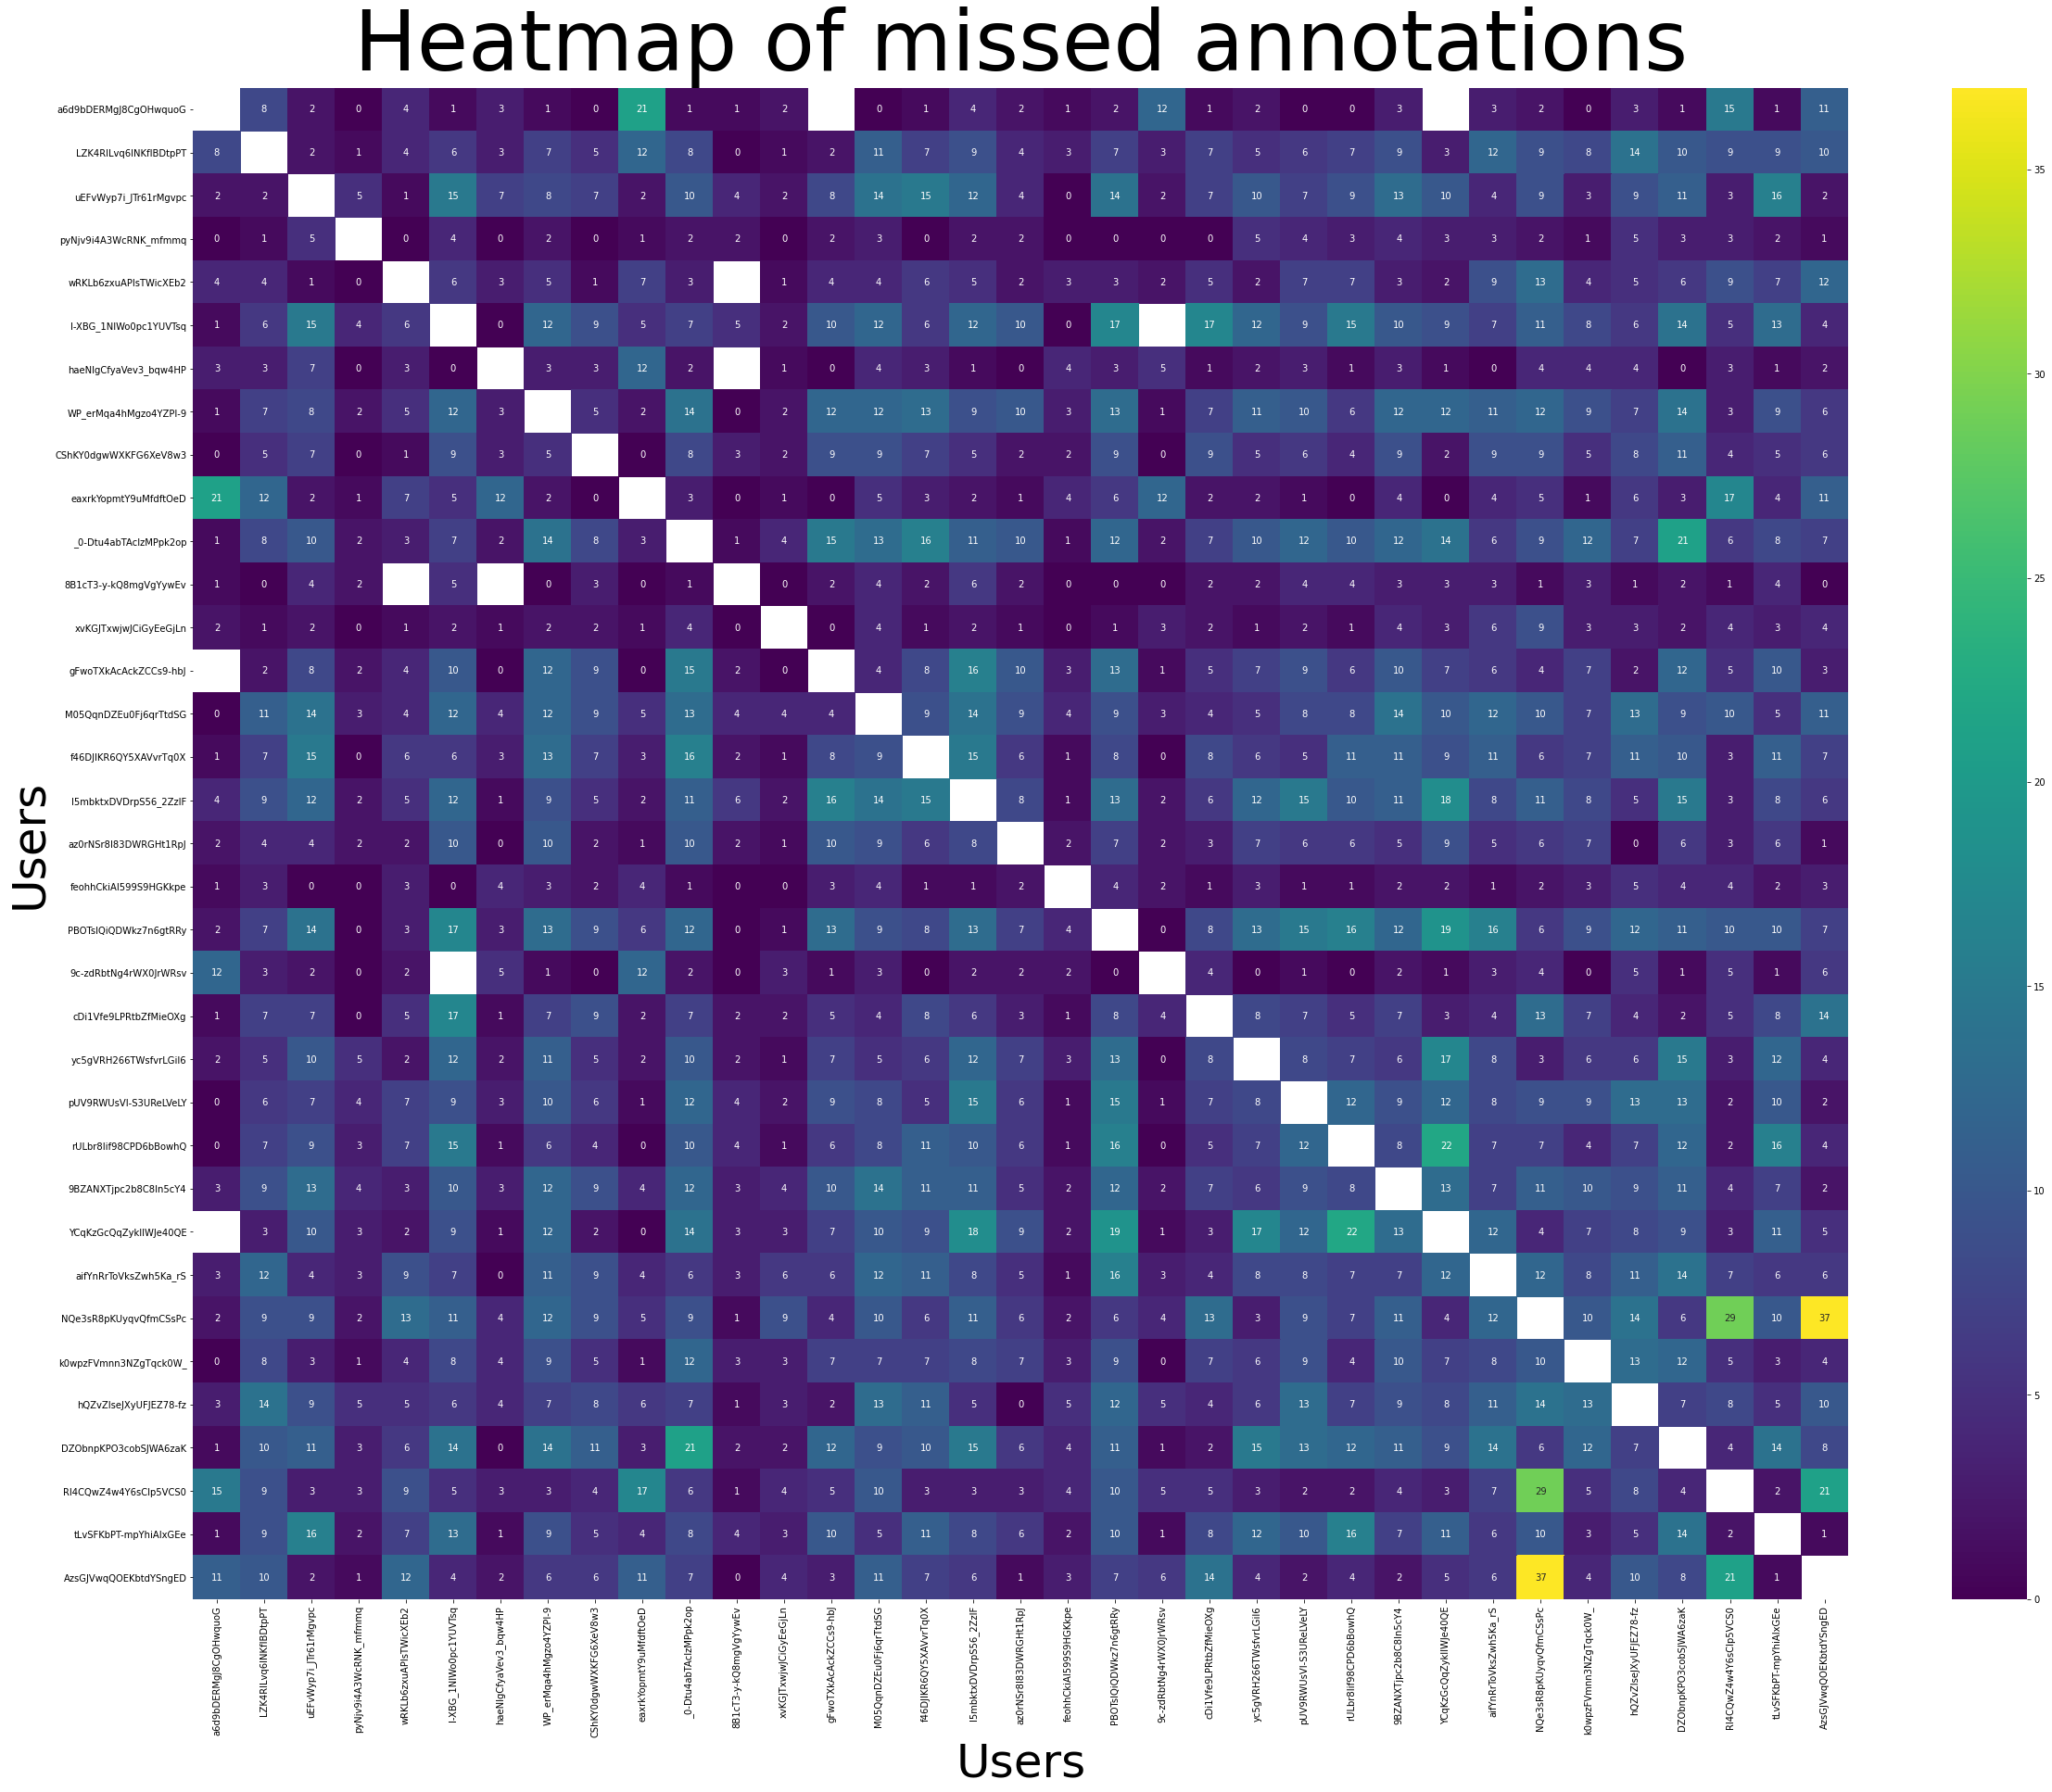

In [149]:
hdf = miss_df.fillna(0).round(2)
plt.figure(figsize=(40,30))
ax = sns.heatmap(hdf, annot=True, fmt="g", cmap='viridis', mask=miss_df.isnull())

plt.title('Heatmap of missed annotations', fontsize = 90) # title with fontsize 20
plt.xlabel('Users', fontsize = 50) # x-axis label with fontsize 15
plt.ylabel('Users', fontsize = 50) # y-axis label with fontsize 15
plt.show()

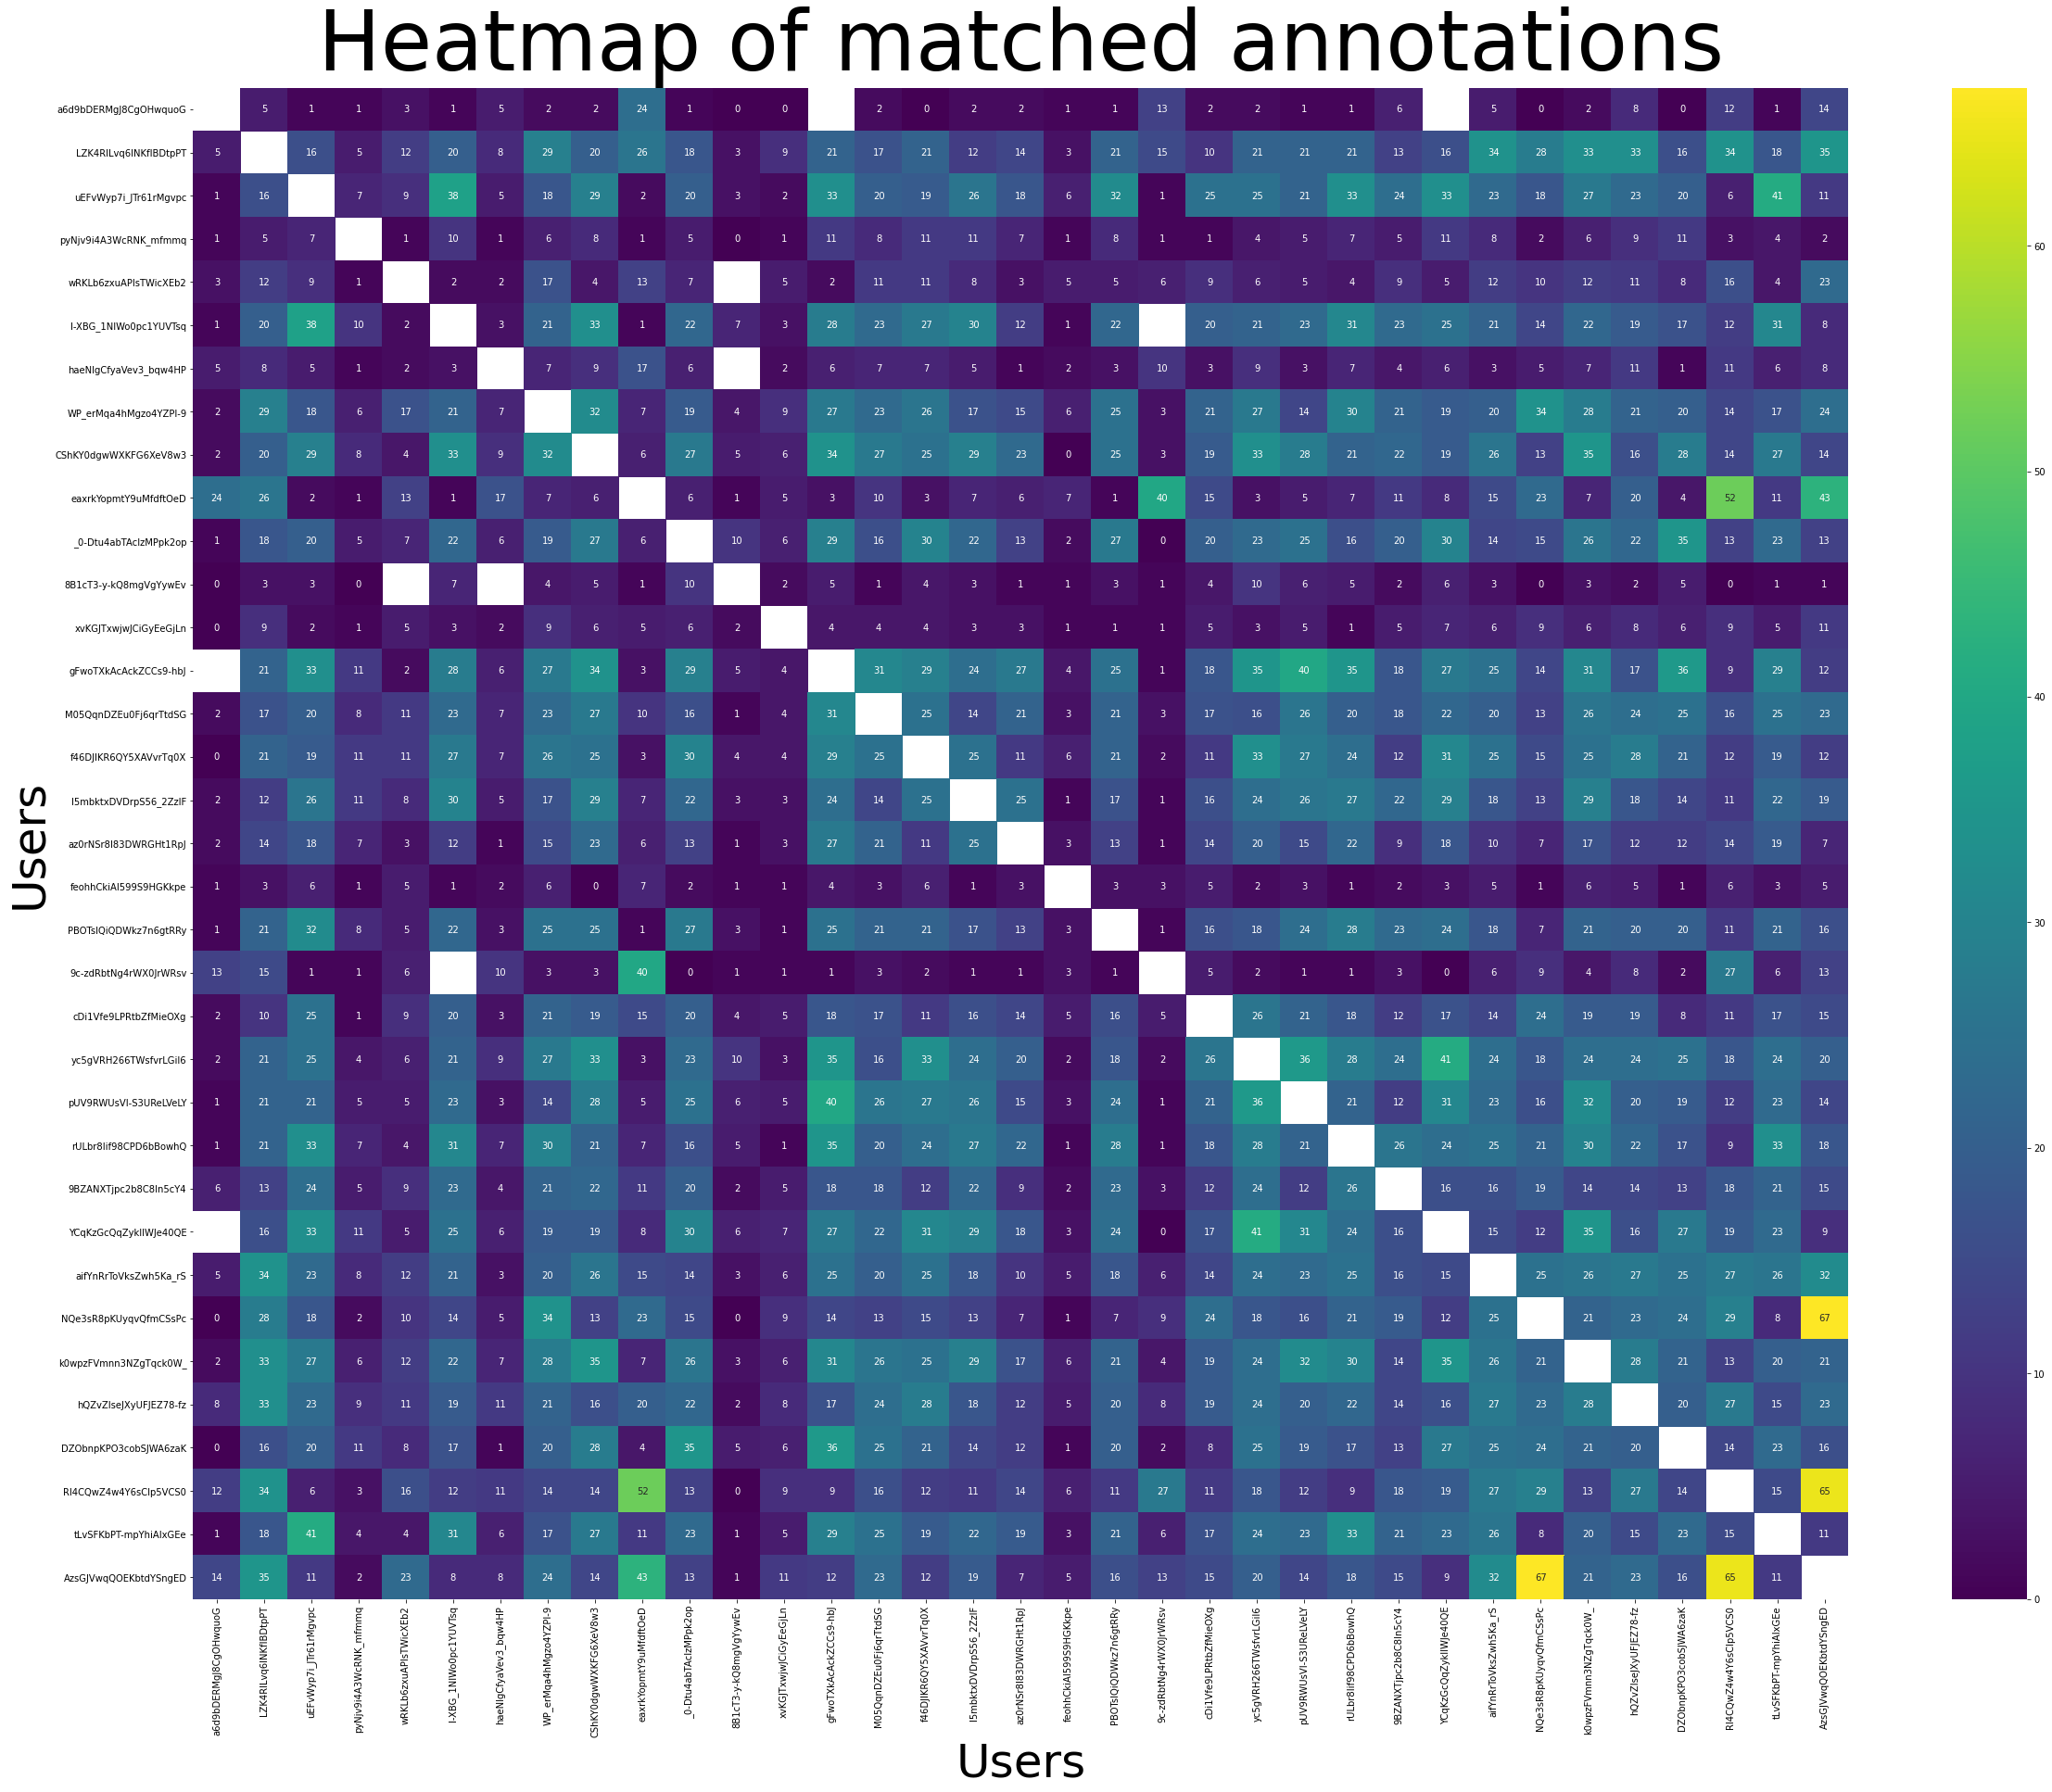

In [150]:
hdf = matched_df.fillna(0).round(2)
plt.figure(figsize=(40,30))
ax = sns.heatmap(hdf, annot=True, fmt="g", cmap='viridis', mask=matched_df.isnull())

plt.title('Heatmap of matched annotations', fontsize = 90) # title with fontsize 20
plt.xlabel('Users', fontsize = 50) # x-axis label with fontsize 15
plt.ylabel('Users', fontsize = 50) # y-axis label with fontsize 15
plt.show()

In [151]:
matched_df.to_csv('../data/filter_matched_counts.csv')
miss_df.to_csv('../data/filter_miss_counts.csv')
ratio_df.to_csv('../data/filter_ratio_score.csv')

## Cohen’s kappa

In [152]:
def cohen_kappa_score(y1, y2):
    confusion = metrics.confusion_matrix(y1, y2)
    n_classes = confusion.shape[0]
    sum0 = np.sum(confusion, axis=0)
    sum1 = np.sum(confusion, axis=1)
    expected = np.outer(sum0, sum1) / np.sum(sum0)

    w_mat = np.ones([n_classes, n_classes], dtype=np.int)
    w_mat.flat[:: n_classes + 1] = 0

    k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
    return 1 - k

In [153]:
def get_annotated_tweets(user1_annot, user2_annot):
    u1_annotations = []
    u2_annotations = []
    for idx, annot in user1_annot:
        u2annot = list(filter(lambda x: x[0] == idx, user2_annot))
        if len(u2annot) != 0:
            u1_annotations.append(annot)
            u2_annotations.append(u2annot[0][1])
                
    return u1_annotations, u2_annotations

In [154]:
u1, u2 = get_annotated_tweets(
    unique_users_with_tweets['pyNjv9i4A3WcRNK_mfmmq'], 
    unique_users_with_tweets['DZObnpKPO3cobSJWA6zaK']
)
print(u1)
print()
print(u2)
confusion = metrics.confusion_matrix(u1, u2)
n_classes = confusion.shape[0]
sum0 = np.sum(confusion, axis=0)
sum1 = np.sum(confusion, axis=1)
expected = np.outer(sum0, sum1) / np.sum(sum0)
w_mat = np.ones([n_classes, n_classes], dtype=np.int)
w_mat.flat[:: n_classes + 1] = 0
print(confusion)
print(expected)
print(sum0)
print(sum1)
print(np.sum(w_mat * confusion))
print(np.sum(w_mat * expected))

['oczekiwanie', 'neutralne', 'neutralne', 'neutralne', 'oczekiwanie', 'oczekiwanie', 'neutralne', 'neutralne', 'neutralne', 'neutralne', 'neutralne', 'radosc', 'neutralne', 'neutralne']

['oczekiwanie', 'neutralne', 'neutralne', 'neutralne', 'radosc', 'oczekiwanie', 'neutralne', 'neutralne', 'neutralne', 'neutralne', 'oczekiwanie', 'podziw', 'neutralne', 'neutralne']
[[9 1 0 0]
 [0 2 0 1]
 [0 0 0 0]
 [0 0 1 0]]
[[6.42857143 1.92857143 0.         0.64285714]
 [2.14285714 0.64285714 0.         0.21428571]
 [0.71428571 0.21428571 0.         0.07142857]
 [0.71428571 0.21428571 0.         0.07142857]]
[9 3 1 1]
[10  3  0  1]
3
6.857142857142858


In [155]:

rows = []
for first_user in unique_users:
    curr_user_ratio_data = [first_user]
    for sec_user in unique_users:
        u1_annot, u2_annot = get_annotated_tweets(
            unique_users_with_tweets[first_user], 
            unique_users_with_tweets[sec_user]
        )
        if len(u1_annot) + len(u2_annot) == 0:
            curr_user_ratio_data.append(None)
            continue
            
        
        if len(u1_annot) != len(u2_annot):
            print('ERROR')
            raise
            
        curr_user_ratio_data.append(cohen_kappa_score(u1_annot, u2_annot))
        
#     print(curr_user_match_data, len(curr_user_match_data))
#     print(curr_user_ratio_data)
    rows.append(curr_user_ratio_data)
#     print(new_ratio_row)
    
cohen_df = pd.DataFrame(rows, columns=['user'] + unique_users, index=unique_users)

# cohen_df.set_index('user', inplace=True)

<ipython-input-152-ef23175804ca>:11: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


In [156]:
cohen_df = cohen_df.drop(columns=['user'])

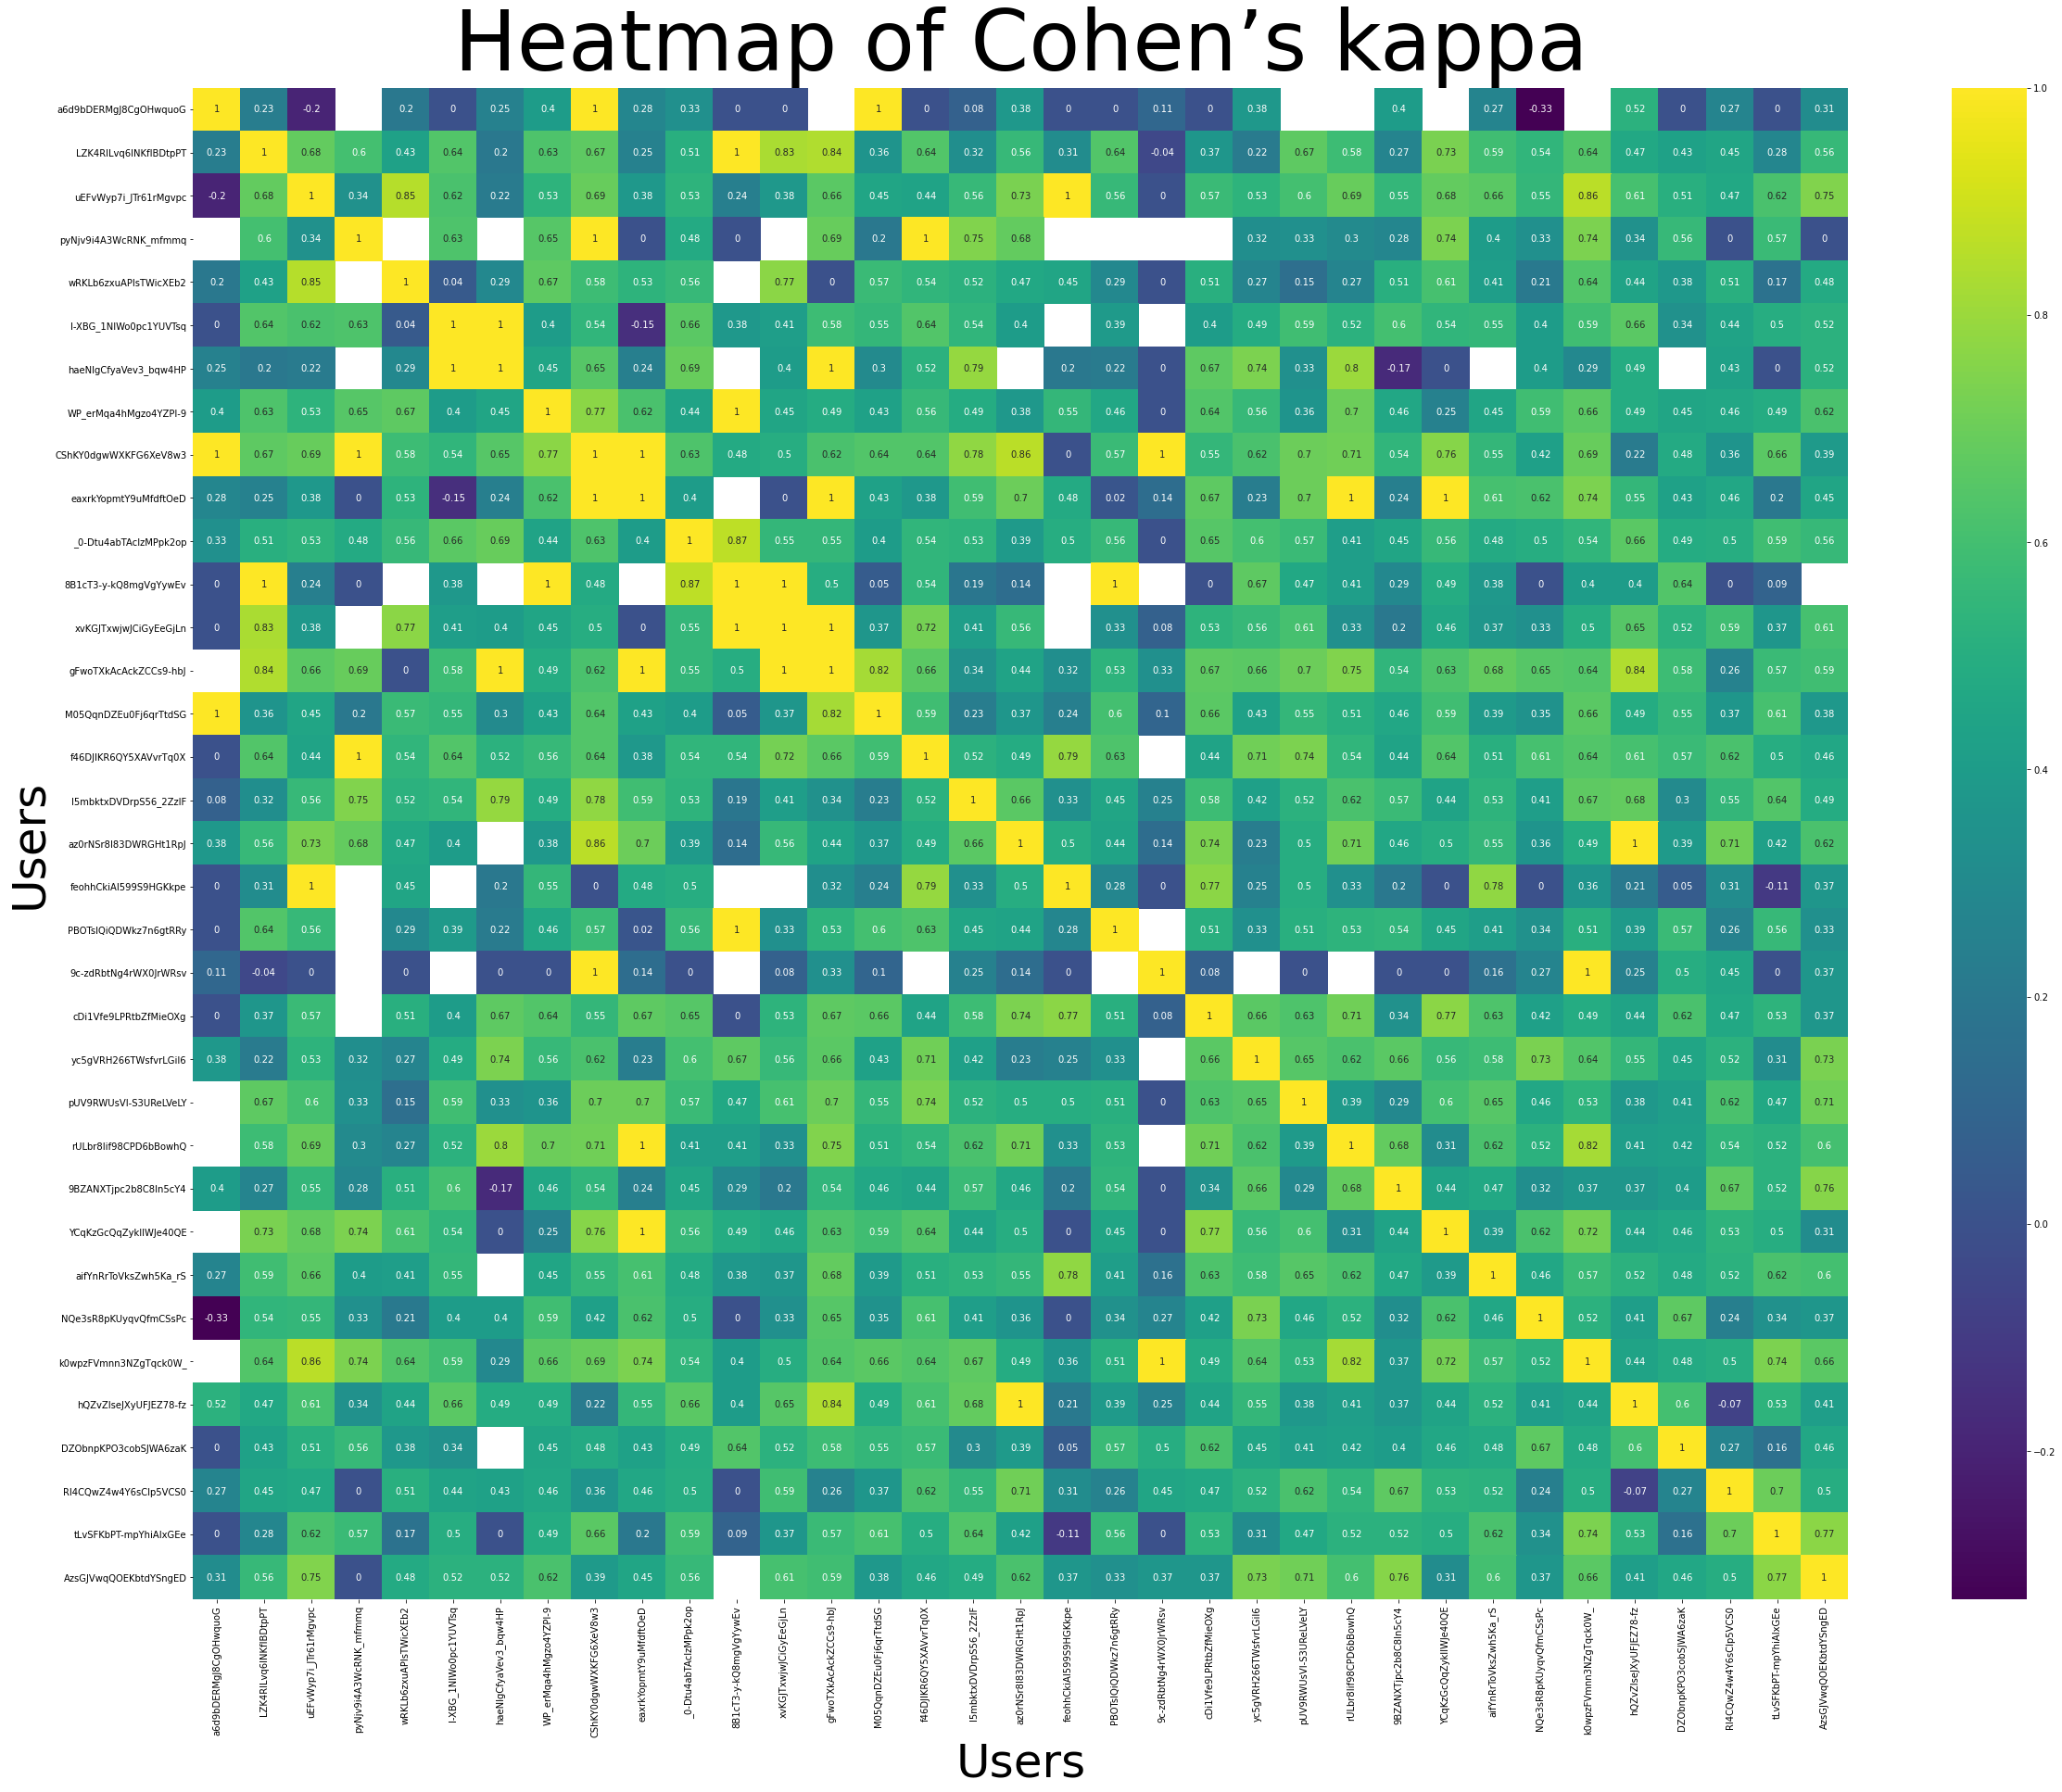

In [157]:
# ax = sns.heatmap(uniform_data, vmin=0, vmax=1)
hdf = cohen_df.fillna(0).round(2)
plt.figure(figsize=(40,30))
ax = sns.heatmap(hdf, annot=True, fmt="g", cmap='viridis', mask=cohen_df.isnull())

plt.title('Heatmap of Cohen’s kappa', fontsize = 90) # title with fontsize 20
plt.xlabel('Users', fontsize = 50) # x-axis label with fontsize 15
plt.ylabel('Users', fontsize = 50) # y-axis label with fontsize 15
plt.show()

In [158]:
cohen_np = np.array(cohen_df.to_numpy(), dtype=np.float)
match_np = np.array(matched_df.to_numpy(), dtype=np.float)
miss_np = np.array(miss_df.to_numpy(), dtype=np.float)
cohen_np.shape

(35, 35)

In [169]:
tt = np.ma.masked_where(~np.isnan(cohen_np), cohen_np)

In [160]:
value = (np.nan_to_num(match_np) + np.nan_to_num(miss_np)) * tt.mask

In [161]:
weighted_cohen = np.nan_to_num(cohen_np) * value / np.sum(value) 

In [164]:
np.sum(weighted_cohen)

0.5103626801524962

In [170]:
np.nanmean(cohen_np)

0.4899766281979986